In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("holdout_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Step 1:
Preprocess the data

In [5]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
#combine parch and sibsp columns into 'famsize'column and categorize them as  alone or not.

data = [train, test]
for dataset in data:
    dataset['Famsize'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Famsize'] > 0, 'Alone'] = 0
    dataset.loc[dataset['Famsize'] == 0, 'Alone'] = 1
    dataset['Alone'] = dataset['Alone'].astype(int)

In [8]:
#we can now drop Parch and Sibsp
train.drop('Parch', axis=1, inplace=True)
train.drop('SibSp', axis=1, inplace=True)
test.drop('Parch', axis=1, inplace=True)
test.drop('SibSp', axis=1, inplace=True)

In [9]:
#For age and fare, fill the missing values with median value
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Age'] = dataset['Age'].astype(int)
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    dataset['Fare'] = dataset['Fare'].astype(int)  

In [10]:
#I will create age groups by using age column

data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Age'] <= 5,                          'Age Group'] = 0
    dataset.loc[(dataset['Age'] > 5) & (dataset['Age'] <= 12), 'Age Group'] = 1
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age Group'] = 2
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 35), 'Age Group'] = 3
    dataset.loc[(dataset['Age'] > 35) & (dataset['Age'] <= 60), 'Age Group'] = 4
    dataset.loc[(dataset['Age'] > 60),                          'Age Group'] = 5


In [11]:
train['Age Group'].value_counts()

3.0    535
4.0    195
2.0     70
0.0     44
1.0     25
5.0     22
Name: Age Group, dtype: int64

In [12]:
#I will create fare groups by using fare column

data = [train, test]
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 8,                           'Fare Group'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 20), 'Fare Group'] = 2
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 50),'Fare Group'] = 3
    dataset.loc[(dataset['Fare'] > 50) & (dataset['Fare'] <= 100),'Fare Group'] = 4
    dataset.loc[(dataset['Fare'] > 100) ,                         'Fare Group'] = 5

In [13]:
train['Fare Group'].value_counts()

1.0    311
2.0    213
3.0    208
4.0    106
5.0     53
Name: Fare Group, dtype: int64

In [14]:
test.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Famsize,Alone,Age Group,Fare Group
0,NaN,892,3,"Kelly, Mr. James",male,34,330911,7,NaN,Q,0,1,3.0,1.0
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,363272,7,NaN,S,1,0,4.0,1.0
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62,240276,9,NaN,Q,0,1,5.0,2.0
3,NaN,895,3,"Wirz, Mr. Albert",male,27,315154,8,NaN,S,0,1,3.0,1.0
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,3101298,12,NaN,S,2,0,3.0,2.0


In [15]:
#We can now drop the age and fare columns
train.drop('Age', axis=1, inplace=True)
test.drop('Age', axis=1, inplace=True)
train.drop('Fare', axis=1, inplace=True)
test.drop('Fare', axis=1, inplace=True)

In [16]:
#Convert Fare and Age Group columns data types from float to int64 and 
#fill the NA values with the median value
data = [train, test]
for dataset in data:
    dataset['Age Group'] = dataset['Age Group'].fillna(dataset['Age Group'].median())
    dataset['Age Group'] = dataset['Age Group'].astype(int)
    dataset['Fare Group'] = dataset['Fare Group'].fillna(dataset['Fare Group'].median())
    dataset['Fare Group'] = dataset['Fare Group'].astype(int)  


In [17]:
# Drop the columns which are not helpful predicting the survival rate 
train = train.drop(['Name','PassengerId','Cabin','Ticket'], axis=1)
test = test.drop(['Name','Cabin','Ticket'], axis=1)

In [18]:
train.count()


Survived      891
Pclass        891
Sex           891
Embarked      889
Famsize       891
Alone         891
Age Group     891
Fare Group    891
dtype: int64

In [19]:
#convert sex into numeric, 0 for male and 1 for female
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [21]:
dataset.head()

,Survived,PassengerId,Pclass,Sex,Embarked,Famsize,Alone,Age Group,Fare Group
0,NaN,892,3,0,2,0,1,3,1
1,NaN,893,3,1,0,1,0,4,1
2,NaN,894,2,0,2,0,1,5,2
3,NaN,895,3,0,0,0,1,3,1
4,NaN,896,3,1,0,2,0,3,2


In [20]:
#convert embarked column to a numeric value
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [21]:
MostFreqPort = train.Embarked.dropna().mode()[0]
train['Embarked'] = train['Embarked'].fillna(MostFreqPort)

In [22]:
train['Embarked'] = train['Embarked'].astype(int)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Embarked      891 non-null int32
Famsize       891 non-null int64
Alone         891 non-null int32
Age Group     891 non-null int32
Fare Group    891 non-null int32
dtypes: int32(4), int64(4)
memory usage: 41.8 KB


In [24]:
test.head()

,Survived,PassengerId,Pclass,Sex,Embarked,Famsize,Alone,Age Group,Fare Group
0,NaN,892,3,0,2,0,1,3,1
1,NaN,893,3,1,0,1,0,4,1
2,NaN,894,2,0,2,0,1,5,2
3,NaN,895,3,0,0,0,1,3,1
4,NaN,896,3,1,0,2,0,3,2


C:\Users\Gokturk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


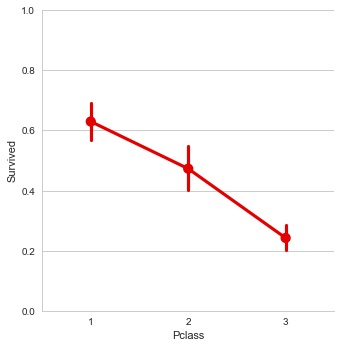

In [25]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=train, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

C:\Users\Gokturk\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


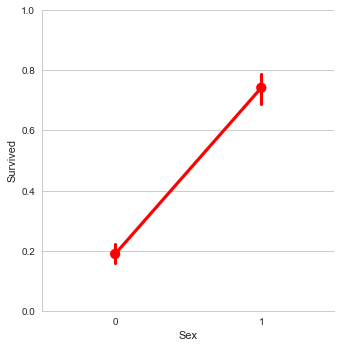

In [26]:
h = sns.PairGrid(data=train, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [27]:
print (train.isnull().sum())

Survived      0
Pclass        0
Sex           0
Embarked      0
Famsize       0
Alone         0
Age Group     0
Fare Group    0
dtype: int64


In [28]:
print (test.isnull().sum())

Survived       418
PassengerId      0
Pclass           0
Sex              0
Embarked         0
Famsize          0
Alone            0
Age Group        0
Fare Group       0
dtype: int64


# Step 2:
Build your models:

In [29]:
X = train.drop(['Survived'], axis=1)
Y = train["Survived"]

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Survived       0 non-null float64
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Embarked       418 non-null int64
Famsize        418 non-null int64
Alone          418 non-null int32
Age Group      418 non-null int32
Fare Group     418 non-null int32
dtypes: float64(1), int32(3), int64(5)
memory usage: 24.6 KB


In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Embarked      891 non-null int32
Famsize       891 non-null int64
Alone         891 non-null int32
Age Group     891 non-null int32
Fare Group    891 non-null int32
dtypes: int32(4), int64(4)
memory usage: 41.8 KB


In [32]:
X_train,x_test,Y_train,y_test = train_test_split(X, Y,test_size=0.25,random_state=1)

In [33]:
SEED=1

In [36]:
# Logistic Regression
log_reg = LogisticRegression(random_state=SEED)
log_reg.fit(X_train, Y_train)
y_pred_log_reg = log_reg.predict(x_test)
acc_log_reg = round( accuracy_score(y_test, y_pred_log_reg) * 100, 2)
print (str(acc_log_reg) + ' percent')

80.72 percent


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Support Vector Machines
svc = SVC(random_state=SEED)
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(x_test)
acc_svc = round(accuracy_score(y_test, y_pred_svc) * 100, 2)
print(acc_svc)

79.37


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
# Linear SVC
linear_svc = LinearSVC(random_state=SEED)
linear_svc.fit(X_train, Y_train)
y_pred_linsvc = linear_svc.predict(x_test)
acc_linear_svc = round(accuracy_score(y_test, y_pred_linsvc) * 100, 2)
print(acc_linear_svc)

79.82


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
# KNN 
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(x_test)
acc_knn = round(accuracy_score(y_test, y_pred_knn ) * 100, 2)
print(acc_knn)

75.78


In [40]:
# Decision Tree
decisiontree = DecisionTreeClassifier(random_state=SEED)
decisiontree.fit(X_train, Y_train)
y_pred_dt = decisiontree.predict(x_test)
acc_decision_tree = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
print(acc_decision_tree)

75.78


In [41]:
# Random Forest
randomforest = RandomForestClassifier(n_estimators = 100, random_state=SEED)
randomforest.fit(X_train, Y_train)
y_pred_rf = randomforest.predict(x_test)
acc_random_forest = round(accuracy_score(y_test, y_pred_rf ) * 100, 2)
print(acc_random_forest)

76.23


In [42]:
# Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
y_pred_nb = gaussian.predict(x_test)
acc_gnb = round(accuracy_score(y_test, y_pred_nb ) * 100, 2)
print(acc_gnb)          

77.13


In [43]:
# Perceptron 
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred_p = perceptron.predict(x_test)
acc_perceptron = round(accuracy_score(y_test, y_pred_p ) * 100, 2)
print(acc_perceptron)

78.92


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [44]:
# Stochastic Gradient Decent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
y_pred_sgd = sgd.predict(x_test)
acc_sgd = round(accuracy_score(y_test, y_pred_sgd ) * 100, 2)
print(acc_sgd)

69.06


C:\Users\Gokturk\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,80.72
2,Linear SVC,79.82
1,Support Vector Machines,79.37
7,Perceptron,78.92
6,Naive Bayes,77.13
5,Random Forest,76.23
3,KNN,75.78
4,Decision Tree,75.78
8,Stochastic Gradient Decent,69.06


In [46]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.82      0.69      0.75        95

   micro avg       0.81      0.81      0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [47]:
print(classification_report(y_test,y_pred_linsvc))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       128
           1       0.82      0.67      0.74        95

   micro avg       0.80      0.80      0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.79       223



In [50]:
test_df = test.drop(['PassengerId','Survived'], axis=1)

In [51]:
predictions = log_reg.predict(test_df)

In [52]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived' : predictions})

In [53]:
submission.to_csv('Titanic Results from.csv', index=False)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_log_reg)

array([[114,  14],
       [ 29,  66]], dtype=int64)

True positive: 114 (We predicted a positive result and it was positive)
True negative: 66 (We predicted a negative result and it was negative)
False positive: 14 (We predicted a positive result and it was negative)
False negative: 29 (We predicted a negative result and it was positive)

Logistic Regression had the highest accuracy and f score amongst all the models used.So I used Logistic Regression model for my final prediction.
Logistic Regression does not require too many computational resources, easy to implement and very efficient to train.A disadvantage is, it can only predict a categorical outcome but it is not a problem for us here as we are doing a categorical prediction.